데이터 전처리 과정
1. 맨위의 열은 최근에 가까운 시간, 가장 과거의 시간이 맨 위로 올러와야 한다,
2. 네트워크 설계(7x5의 배열으로 입력)
3. 단위표준화 작업
4. reshape
5. 데이터를 train/test 로 나누기(시간의 순서는 바꾸지 않는다.)
6. 표준화 시킨 값을 원래의 값으로 되돌려 주어야 한다.
7. RMSE(or MSE)로 측정
8. 데이터 시각화

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.set_random_seed(777) # reproducibility

import matplotlib.pyplot as plt

In [2]:
#train Parameters
seq_length = 7 #과거 7일 data 를 쓰겠다.
data_dim = 5 
hidden_dim = 10 # hidden_layers 의 개수
output_dim = 1
learning_rate = 0.01
iterations = 500

In [5]:
xy1 = np.loadtxt('C:/Users/Affinity/Documents/KSA/Module6/datasets/data-02-stock_daily.csv',
                  delimiter=',')
xy1 = xy1[::-1] # 1D 표현 , 행단위로 불러오겠다. 전체 데이터를(::) (:-1)을 쓰니 역순으로 불러온다.
min1 = np.min(xy1,0) # 열 단위로 최솟값을
max1 = np.max(xy1,0) # 열 단위로 최댓값을(칼럼별 최소,최대값 구하기)

xy=(xy1-min1)/(max1-min1) # 표준화


In [7]:
xy[1]
x = xy
y0 = xy[:,-1]
y = xy[:,[-1]] # 종가 값들만 쭉 드루와 드루와

In [10]:
x

array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       ...,
       [9.47895671e-01, 9.49273354e-01, 9.72504894e-01, 1.14170476e-01,
        9.66454635e-01],
       [9.56900354e-01, 9.59881107e-01, 9.80354498e-01, 1.42502465e-01,
        9.77850239e-01],
       [9.73335806e-01, 9.75431522e-01, 1.00000000e+00, 1.11123062e-01,
        9.88313021e-01]])

In [12]:
dataX = []
dataY = []
for i in range(0,len(y) - seq_length):
    _x = x[i:i + seq_length] # Next close price
    _y = y[i+ seq_length] # 앞에 7개 데이터는 날린다.
    print(_x,"->",_y)
    dataX.append(_x) # list 안에 list 추가
    dataY.append(_y)
dataX[0]

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

 [0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]] -> [0.12076831]
[[0.12617455 0.13834018 0.14207603 0.13039347 0.1455995 ]
 [0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]
 [0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]
 [0.12279408 0.11796265 0.12382429 0.16997401 0.12076831]] -> [0.13589432]
[[0.13258563 0.13935175 0.15243448 0.10471453 0.13860474]
 [0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.1111668  0.12883062 0.12954637 0.13597741 0.1376721 ]
 [0.12634939 0.12900403 0.14286837 0.09159272 0.1376431 ]
 [0.12448431 0.12328108 0.1287834  0.23209644 0.11528913]
 [0.12279408 0.11796265 0.12382429 0.16997401 0.12076831]
 [0.11154565 0.13591215 0.12843129 0.17308416 0.13589432]] -> [0.13918767]
[[0.1266699  0.12435052 0.1241764  0.21498611 0.11590123]
 [0.1111668  0.128830

 [0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]] -> [0.58626459]
[[0.65514396 0.66453912 0.67158451 0.10831765 0.66116585]
 [0.6465183  0.6632384  0.67181931 0.11212692 0.65810571]
 [0.64643079 0.6546538  0.66187173 0.11635744 0.65784351]
 [0.65377441 0.65612793 0.67416678 0.10814735 0.6597378 ]
 [0.64185562 0.63783177 0.63293881 0.17698306 0.6347901 ]
 [0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]
 [0.59482199 0.59687455 0.60403508 0.18594604 0.58626459]] -> [0.59276376]
[[0.6465183  0.6632384  0.67181931 0.11212692 0.65810571]
 [0.64643079 0.6546538  0.66187173 0.11635744 0.65784351]
 [0.65377441 0.65612793 0.67416678 0.10814735 0.6597378 ]
 [0.64185562 0.63783177 0.63293881 0.17698306 0.6347901 ]
 [0.62361343 0.61519982 0.58948659 0.30424845 0.58046468]
 [0.59482199 0.59687455 0.60403508 0.18594604 0.58626459]
 [0.59374378 0.59771288 0.59992706 0.1306534  0.59276376]] -> [0.59719378]
[[0.64643079 0.6546538  0.66187173 0.11635744 0.65784351]
 [0.65377441 0.656127

array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
        2.17448151e-01],
       [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
        2.16981885e-01],
       [2.19142111e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
        2.24967474e-01],
       [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
        1.47442742e-01]])

In [13]:
# train,test 데이터 split(사이킷런의 split함수는 순서를 무작위로 가져오는 방식)
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size
trainX,testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY,testY = np.array(dataY[0:train_size]),np.array(dataY[train_size:len(dataY)])

In [ ]:
#model making
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(10,input_shape = (7,5), return_sequences=True)) # node의 개수는 하이퍼 파라미터!
model.add(tf.keras.layers.LSTM(5))
model.add(tf.keras.layers.Dense(1))
optimizer = tf.train.AdamOptimizer(learning_rate)
model.compile(loss='mean_squared_error',
             optimizer = optimizer,
             metrics=['mean_absolute_error','mse'])

In [16]:
model.fit(trainX,trainY,epochs=100)
# fit 의 shuffle 매개변수 확인
model.evaluate(testX,testY)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
507/507 [==============================] - 1s 2ms/sample - loss: 0.0204 - mean_absolute_error: 0.1072 - mean_squared_error: 0.0204
Epoch 2/100
507/507 [==============================] - 0s 470us/sample - loss: 0.0041 - mean_absolute_error: 0.0463 - mean_squared_error: 0.0041
Epoch 3/100
507/507 [==============================] - 0s 450us/sample - loss: 0.0021 - mean_absolute_error: 0.0326 - mean_squared_error: 0.0021
Epoch 4/100
507/507 [==============================] - 0s 464us/sample - loss: 0.0017 - mean_absolute_error: 0.0287 - mean_squared_error: 0.0017
Epoch 5/100
507/507 [==============================] - 0s 447us/sample - loss: 0.0016 - mean_absolute_error: 0.0281 - mean_squared_error: 0.0016
Epoch 6/100
507/507 [==============================] - 0s 466us/sample - loss: 0.0016 - mean_absolute_error: 0.0276 - mean_squared_error: 0.0016
Epoch 7/100
507/507 [==============================] - 0s 460us/sample - loss: 0.001

507/507 [==============================] - 0s 450us/sample - loss: 9.2311e-04 - mean_absolute_error: 0.0211 - mean_squared_error: 9.2311e-04
Epoch 54/100
507/507 [==============================] - 0s 441us/sample - loss: 9.7451e-04 - mean_absolute_error: 0.0219 - mean_squared_error: 9.7451e-04
Epoch 55/100
507/507 [==============================] - 0s 437us/sample - loss: 9.7543e-04 - mean_absolute_error: 0.0216 - mean_squared_error: 9.7543e-04
Epoch 56/100
507/507 [==============================] - 0s 437us/sample - loss: 9.0394e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 9.0394e-04
Epoch 57/100
507/507 [==============================] - 0s 425us/sample - loss: 0.0010 - mean_absolute_error: 0.0216 - mean_squared_error: 0.0010
Epoch 58/100
507/507 [==============================] - 0s 452us/sample - loss: 8.9891e-04 - mean_absolute_error: 0.0204 - mean_squared_error: 8.9891e-04
Epoch 59/100
507/507 [==============================] - 0s 439us/sample - loss: 8.7717e-04 - mean

[0.0010498731798671802, 0.026271567, 0.0010498732]

In [17]:
pred = model.predict(testX)

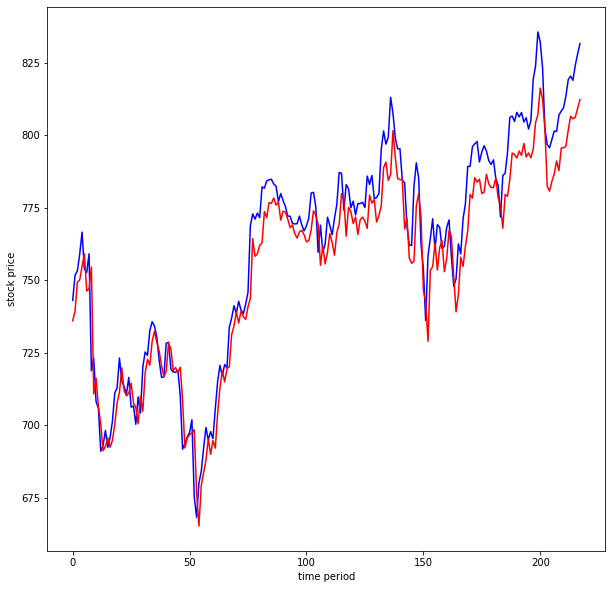

In [19]:
testY1 = (testY*(max1[-1]-min1[-1]))+min1[-1] # 마지막 y의 값들로 예측 했기에 마지막 값들로 빼준다.
pred1 = (pred*(max1[-1]-min1[-1]))+min1[-1] # 표준화 해제

plt.figure(figsize=(10,10))
plt.plot(testY1,c='blue')
plt.plot(pred1,c='red')
plt.xlabel('time period')
plt.ylabel('stock price')
plt.show()

In [24]:
from pandas_datareader import data
# '035420.KS' = Naver종목코드.KospiCode
naver = data.get_data_yahoo('035420.KS')
print(naver.head())
print(naver.tail())

                    High           Low          Open         Close     Volume  \
Date                                                                            
2010-01-04  47435.398438  46332.300781  46577.398438  47312.800781   974308.0   
2010-01-05  48048.300781  46577.398438  46945.101562  47312.800781   920401.0   
2010-01-06  48293.398438  47067.699219  47312.800781  47067.699219  1283697.0   
2010-01-07  48048.300781  46822.601562  47190.300781  47190.300781   733984.0   
2010-01-08  47803.101562  45596.800781  47190.300781  45596.800781   885303.0   

               Adj Close  
Date                      
2010-01-04  44615.210938  
2010-01-05  44615.210938  
2010-01-06  44384.082031  
2010-01-07  44499.687500  
2010-01-08  42997.046875  
                High       Low      Open     Close    Volume  Adj Close
Date                                                                   
2019-07-16  120500.0  117500.0  119000.0  120000.0  391260.0   120000.0
2019-07-17  120000.0  11800

In [25]:
naver.to_csv('naver.csv')